# Combining Health and County Climate Data and Exploring

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [25]:
#counties['features']

In [68]:
climate_df = pd.read_csv('./data/01_climate_data/01_climate_data_CLEAN/precip_airTemp_1979_2011.zip', parse_dates=['month_year_short'])
diseases_df = pd.read_csv('./data/03 - Health Data/df_inf.zip')

In [71]:
diseases_df.head()

,Unnamed: 0,location_name,FIPS,cause_id,cause_name,sex,age_id,year_id,mx,lower,upper,State
0,0,Autauga County,1001.0,297,Tuberculosis,Male,27,1980,1.603355,1.019430,2.415666,ALABAMA
1,1,Autauga County,1001.0,297,Tuberculosis,Male,27,1981,1.587168,1.015724,2.358733,ALABAMA
2,2,Autauga County,1001.0,297,Tuberculosis,Male,27,1982,1.581729,1.016698,2.276908,ALABAMA
3,3,Autauga County,1001.0,297,Tuberculosis,Male,27,1983,1.525469,0.987612,2.192124,ALABAMA
4,4,Autauga County,1001.0,297,Tuberculosis,Male,27,1984,1.606567,1.053617,2.353721,ALABAMA


In [56]:
diseases_df['FIPS'] = diseases_df['FIPS'].astype('float64')
#diseases_df.drop(columns='Unnamed: 0', inplace=True)
#climate_df['county_FIPS'] = climate_df['county_FIPS'].astype('float64')
#climate_df['month_year_long'] = climate_df['month_year_long'].astype('string')
climate_df.drop(columns='Unnamed: 0', inplace=True)

In [57]:
climate_df['year'] = climate_df['month_year_short'].dt.year

In [58]:
diseases_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4290195 entries, 0 to 4290194
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   location_name  object 
 1   FIPS           float64
 2   cause_id       int64  
 3   cause_name     object 
 4   sex            object 
 5   year_id        int64  
 6   mx             float64
dtypes: float64(2), int64(2), object(3)
memory usage: 229.1+ MB


In [59]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231956 entries, 0 to 1231955
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   county_name            1231956 non-null  object        
 1   month_year_long        1231956 non-null  object        
 2   month_year_short       1231956 non-null  datetime64[ns]
 3   avg_dailyMaxAirTemp_F  1231956 non-null  float64       
 4   min_dailyMaxAirTemp_F  1231956 non-null  float64       
 5   max_dailyMaxAirTemp_F  1231956 non-null  float64       
 6   avg_daily_precip_mm    1231956 non-null  float64       
 7   min_daily_precip_mm    1231956 non-null  float64       
 8   max_daily_precip_mm    1231956 non-null  float64       
 9   FIPS                   1231956 non-null  int64         
 10  state_abbrv            1231956 non-null  object        
 11  year                   1231956 non-null  int64         
dtypes: datetime64[ns](1), float6

In [66]:
tx_1989 = climate_df[(climate_df['state_abbrv'] == 'TX') & (climate_df['year'] == 1989)]

In [67]:
tx_1989

,county_name,month_year_long,month_year_short,avg_dailyMaxAirTemp_F,min_dailyMaxAirTemp_F,max_dailyMaxAirTemp_F,avg_daily_precip_mm,min_daily_precip_mm,max_daily_precip_mm,FIPS,state_abbrv,year
985764,"Anderson County, TX","Jan, 1989",1989-01-01,62.86,40.5,79.3,3.56,0.0,33.5,4800,TX,1989
985765,"Anderson County, TX","Feb, 1989",1989-02-01,56.67,23.1,83.4,2.55,0.0,18.2,4800,TX,1989
985766,"Anderson County, TX","Mar, 1989",1989-03-01,69.78,27.9,86.8,3.51,0.0,69.1,4800,TX,1989
985767,"Anderson County, TX","Apr, 1989",1989-04-01,77.55,51.7,90.6,2.01,0.0,26.2,4800,TX,1989
985768,"Anderson County, TX","May, 1989",1989-05-01,84.42,64.6,94.0,6.36,0.0,84.9,4800,TX,1989
...,...,...,...,...,...,...,...,...,...,...,...,...
1085959,"Zavala County, TX","Aug, 1989",1989-08-01,97.43,82.3,104.4,1.08,0.0,24.7,4850,TX,1989
1085960,"Zavala County, TX","Sep, 1989",1989-09-01,93.07,78.4,103.4,0.47,0.0,6.9,4850,TX,1989
1085961,"Zavala County, TX","Oct, 1989",1989-10-01,86.32,65.2,99.4,2.91,0.0,46.0,4850,TX,1989
1085962,"Zavala County, TX","Nov, 1989",1989-11-01,75.93,46.9,91.9,0.88,0.0,18.3,4850,TX,1989


In [ ]:
pd.mer

In [30]:
def merge_climate_disease_county_df(county_fips):
    df = climate_df[climate_df['county_FIPS'] == county_fips]
    disease_df = diseases_df[diseases_df['FIPS'] == county_fips]
    df.set_index('month_year_short', inplace=True)
    output = df.resample('Y').mean()
    output = pd.merge(output, disease_df, left_on='county_FIPS', right_on='FIPS')
    return output

In [31]:
climate_df['county_FIPS'][0]

1001.0

In [32]:
diseases_df[diseases_df['FIPS'] == climate_df['county_FIPS'][0]][:50]

,location_name,FIPS,cause_id,cause_name,sex,year_id,mx
3711435,Autauga County,1001.0,491,Cardiovascular diseases,Male,1980,753.862296
3711436,Autauga County,1001.0,491,Cardiovascular diseases,Male,1981,727.755510
3711437,Autauga County,1001.0,491,Cardiovascular diseases,Male,1982,718.834640
3711438,Autauga County,1001.0,491,Cardiovascular diseases,Male,1983,722.039245
3711439,Autauga County,1001.0,491,Cardiovascular diseases,Male,1984,716.026970
3711440,Autauga County,1001.0,491,Cardiovascular diseases,Male,1985,702.533881
3711441,Autauga County,1001.0,491,Cardiovascular diseases,Male,1986,679.756014
3711442,Autauga County,1001.0,491,Cardiovascular diseases,Male,1987,658.835681
3711443,Autauga County,1001.0,491,Cardiovascular diseases,Male,1988,654.435315
3711444,Autauga County,1001.0,491,Cardiovascular diseases,Male,1989,612.450341


In [33]:
temp = merge_climate_disease_county_df(climate_df['county_FIPS'][0])
temp

,county_FIPS,avg_dailyMaxAirTemp_F,min_dailyMaxAirTemp_F,max_dailyMaxAirTemp_F,avg_daily_precip_mm,min_daily_precip_mm,max_daily_precip_mm,avg_FPM,min_FPM,max_FPM,year,location_name,FIPS,cause_id,cause_name,sex,year_id,mx
0,1001.0,71.327500,57.200000,82.241667,4.479167,0.0,44.766667,NaN,NaN,NaN,1979.0,Autauga County,1001.0,491,Cardiovascular diseases,Male,1980,753.862296
1,1001.0,71.327500,57.200000,82.241667,4.479167,0.0,44.766667,NaN,NaN,NaN,1979.0,Autauga County,1001.0,491,Cardiovascular diseases,Male,1981,727.755510
2,1001.0,71.327500,57.200000,82.241667,4.479167,0.0,44.766667,NaN,NaN,NaN,1979.0,Autauga County,1001.0,491,Cardiovascular diseases,Male,1982,718.834640
3,1001.0,71.327500,57.200000,82.241667,4.479167,0.0,44.766667,NaN,NaN,NaN,1979.0,Autauga County,1001.0,491,Cardiovascular diseases,Male,1983,722.039245
4,1001.0,71.327500,57.200000,82.241667,4.479167,0.0,44.766667,NaN,NaN,NaN,1979.0,Autauga County,1001.0,491,Cardiovascular diseases,Male,1984,716.026970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45040,1001.0,77.631667,60.058333,90.316667,3.320000,0.0,36.133333,12.914167,4.233333,23.825,2011.0,Autauga County,1001.0,507,Other cardiovascular and circulatory diseases,Both,2010,13.287554
45041,1001.0,77.631667,60.058333,90.316667,3.320000,0.0,36.133333,12.914167,4.233333,23.825,2011.0,Autauga County,1001.0,507,Other cardiovascular and circulatory diseases,Both,2011,13.471255
45042,1001.0,77.631667,60.058333,90.316667,3.320000,0.0,36.133333,12.914167,4.233333,23.825,2011.0,Autauga County,1001.0,507,Other cardiovascular and circulatory diseases,Both,2012,13.754535
45043,1001.0,77.631667,60.058333,90.316667,3.320000,0.0,36.133333,12.914167,4.233333,23.825,2011.0,Autauga County,1001.0,507,Other cardiovascular and circulatory diseases,Both,2013,13.740277


<AxesSubplot:>

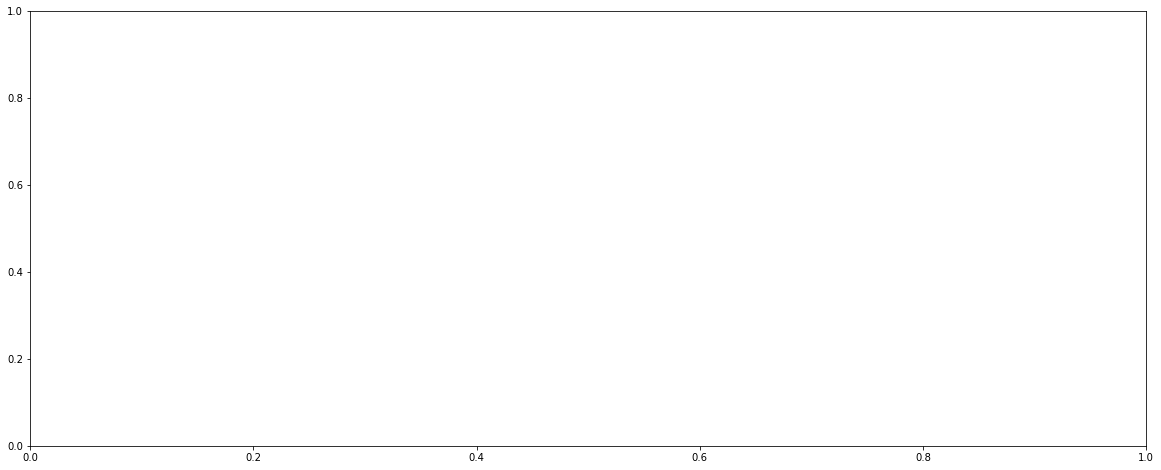

In [38]:
test_county_df = temp[temp['county_FIPS'] == '1001.0']



fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.scatterplot(data=test_county_df, x='year', y='avg_daily_precip_mm', ax=ax)

In [29]:
grouped_temp = temp.groupby(by=['county_name', 'month_year_short'])[['avg_dailyMaxAirTemp_F', 'avg_daily_precip_mm']].mean()
grouped_temp

avg_dailyMaxAirTemp_F  \
county_name          month_year_short                          
Abbeville County, SC 1979-01-01                        47.74   
                     1979-02-01                        50.14   
                     1979-03-01                        64.03   
                     1979-04-01                        70.49   
                     1979-05-01                        76.94   
...                                                      ...   
Ziebach County, SD   2011-08-01                        90.78   
                     2011-09-01                        78.49   
                     2011-10-01                        66.15   
                     2011-11-01                        46.33   
                     2011-12-01                        36.32   

                                       avg_daily_precip_mm  
county_name          month_year_short                       
Abbeville County, SC 1979-01-01                       5.20  
                     1979-02-01                       6.61  
                     1979-03-01                       2.76  
                     1979-04-01                       6.75  
                     1979-05-01                       5.21  
...                                                    ...  
Ziebach County, SD   2011-08-01                       1.67  
                     2011-09-01                       0.43  
                     2011-10-01                       0.76  
                     2011-11-01                       0.17  
                     2011-12-01                       0.12  

[1231956 rows x 2 columns]

In [32]:
#sns.scatterplot(data=grouped_temp, x='month_year_short', y='avg_dailyMaxAirTemp_F', hue='county_name')

In [22]:
tx_climate_df = climate_df

NameError: name 'climate_df' is not defined